In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np 
import pandas as pd

In [13]:

df=pd.read_csv('model_input_ver5_int.csv')
#df=pd.read_csv('model_input_ver2_interference.csv')
df['noise'] = np.where(df['noise']==1, 'bad', 'good')#put 'genuine' if it is 1 labeled and 'forged' otherwise
#Splitting the class table into data X and class label y
X=df[['dpl','nperi','ci','nce']]
y=df['noise']
print(X.head())

   dpl  nperi    ci  nce
0   27      3  10.0   12
1   27      3  15.0    6
2   27      3  20.0   10
3   27      3  25.0    8
4   27      3  30.0   13


### Gini index or Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen.

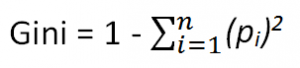

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(random_state=1234)
pred = clf.fit(X_train,y_train).predict_proba(X_train)
predictions = clf.predict(X_test)
print(classification_report(y_test,predictions))
print(clf)

              precision    recall  f1-score   support

         bad       0.78      0.81      0.79       540
        good       0.96      0.95      0.96      2747

    accuracy                           0.93      3287
   macro avg       0.87      0.88      0.88      3287
weighted avg       0.93      0.93      0.93      3287

DecisionTreeClassifier(random_state=1234)


In [16]:
clf.predict([[ 251.       ,   5.       ,  15.             ,
         6.    ]])

array(['bad'], dtype=object)

In [17]:
clf.predict([[ 251.       ,   5.       ,  15.          ,
         12.  ]])

array(['bad'], dtype=object)

In [18]:
import pickle
pickle_out = open("interference2.pkl",mode="wb")
pickle.dump(clf,pickle_out)
pickle_out.close()

In [11]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(max_depth=1, random_state=0)
'''rand_clf.fit(X, y)
rand_pred = rand_clf.predict(X_test)
print(classification_report(y_test,rand_pred))'''
pred = rand_clf.fit(X_train,y_train).predict_proba(X_train)
predictions = rand_clf.predict(X_test)
print(classification_report(y_test,predictions))
print(rand_clf)

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00       540
        good       0.84      1.00      0.91      2747

    accuracy                           0.84      3287
   macro avg       0.42      0.50      0.46      3287
weighted avg       0.70      0.84      0.76      3287

RandomForestClassifier(max_depth=1, random_state=0)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
import pickle
pickle_out = open("rand_interference.pkl",mode="wb")
pickle.dump(rand_clf,pickle_out)
pickle_out.close()